# Metodo de Newton

Dado $X$ un Banach y $F: X \to X$ un operador diferenciable Frechet. Queremos encontrar una raiz de $F$. El metodo de Newton es un metodo iterativo que bajo ciertas condiciones converge a una raiz de $F$. La iteracion, es:
\begin{equation}
    x_{n+1}=x_n-(DF(x_n))^{-1}(F (x_n))
\end{equation}
O de manera implicita
\begin{equation}
    DF(x_n)x_{n+1}=DF(x_n)x_{n}-F (x_n)
\end{equation}

## Ecuacion Lx=Nx:

Si tenemos $Lx=Nx$ con $N(x)(t)=f(x,t)$ con $f$ una funcion buena y $T$-periodica en $t$ y $L$ inversible en $C_T$. Tomamos $F=I-L^{-1}N$.El diferencial de $DF$ es:

$$DF(x)y(t)=\left[y(t)-L^{-1}\left(\frac{df}{dx}(x(t),t)y(t)\right)\right]$$

Entonces la iteracion de manera implicita puede escribirse como

$$\left[ x_{n+1}(t)-L^{-1}\left(\frac{df}{dx}(x_n(t),t)x_{n+1}(t)\right)\right] =\left[ x_n(t)-L^{-1}\left(\frac{df}{dx}(x_n(t),t)x_n(t)\right)\right]-\left[x_n(t)-L^{-1}\left(f(x_n(t),t)\right)\right]$$

Simplifico $x_n$ en el lado derecho y aplico $L$ a ambos lados:

$$L\left(x_{n+1}(t)\right)-\frac{df}{dx}(x_n(t),t)x_{n+1}(t)=f(x_n(t),t)-\frac{df}{dx}(x_n(t),t)x_{n}(t)$$

(Es la misma interacion que si hubiera tomado $F=L-N$)

Me queda una ecuacion de la forma:
$$x′(t)+g(t)x(t)=y(t)$$


Con $g(t)$ e $y(t)$ funciones T-periodicas, defino una funcion que halla la solucion T-periodica $x(t)$ del sistema

\begin{equation}
x'(t)+g(t)x(t)=y(t)
\end{equation}

La solucion es:

$$x(t)=e^{-G(t)}\left[\dfrac{1}{e^{G(T)}-1} \int_{0}^{T}e^{G(s)}y(s)ds+\int_{0}^{t}e^{G(s)}y(s)ds\right]$$

donde $G(t)=\int_{0}^{t}g(s)ds$.

El nucleo de $L$ en $C_T$ es
$$Ker(L)=0 \ \ si  \ \ \bar{g}\neq0$$
$$Ker(L)=<e^{-G(t)}>  \ \ si \ \  \bar{g}=0$$


### Ejemplo 

$$x'(t)+x(t)=acos(x+t)$$

$f(x,t)=acos(x+t)$ $\Longrightarrow$ $\frac{df}{dx}(x,t)=-asen(x+t)$

La iteracion es 
$$x_{n+1}'+x_{n+1}(t)+asen(x_n+t)x_{n+1}=acos(x_n+t)+asen(x_n+t)x_{n}$$
$$x_{n+1}'+\big(1+asen(x_n+t)\big)x_{n+1}=acos(x_n+t)+asen(x_n+t)x_{n}$$

### Implementacion del solver dado por la ecuacion

In [2]:
import numpy as np
from scipy import integrate
import pylab as pl

from math import pi 
import numbers


In [3]:
class mathf:
    def __init__(self, array, intervalo):
        self.array = array
        self.intervalo = intervalo
        self.inicio_intervalo=intervalo[0]
        self.fin_intervalo=intervalo[1]
        self.ancho_intervalo=intervalo[1]-intervalo[0]
        self.paso=(intervalo[1]-intervalo[0])/(len(array)-1)
        self.resolucion=len(array)
        self.grilla=np.linspace(intervalo[0],intervalo[1],len(array))
    
    def plot(self):
        pl.plot(self.grilla, self.array)
        
    def __call__(self,x):    
        array=self.array
        h=self.paso
        a=self.inicio_intervalo
        b=self.fin_intervalo
        L=self.ancho_intervalo
        n=self.resolucion
        if a<=x<=b:
            i=int((x-a)/h)-1
            x_0=(i)*h+a
            x_1=(i+1)*h+a
            t=(x-x_0)/h
            f_0=array[i]
            f_1=array[i+1]
            return float(f_1*t+f_0*(1-t))
        else:
            print('fuera de rango')
        
    def der(self):
        array=self.array
        h=self.paso
        n=self.resolucion
        der=[]
        for i in range(n-1):
            f_0=array[i]
            f_1=array[i+1]
            der.append((f_1-f_0)/h)
        intervalo=self.intervalo
        return mathf(der,intervalo)
    
    def __add__(self, other):
    
        if (type(self)==float or type(self)==int) and (type(other)==float or type(other)==int):
            print('numero mas numero')
            return mathf(self + other,self.intervalo)
        elif (not type(self)==float or type(self)==int) and (type(other)==float or type(other)==int):
            return mathf(self.array + other,self.intervalo)
        elif (type(self)==float or type(self)==int) and not (type(other)==float or type(other)==int):
            print('numero mas funcion')
            return mathf(self + other.array,self.intervalo)
        elif (not type(self)==float or type(self)==int) and not (type(other)==float or type(other)==int):
            print('funcion mas funcion')
            return mathf(self.array + other.array,self.intervalo)
        
    def __mul__(self, other):      
        if (type(self)==float or type(self)==int) and (type(other)==float or type(other)==int):
            return mathf(self * other,self.intervalo)
        elif (not type(self)==float or type(self)==int) and (type(other)==float or type(other)==int):
            return mathf(self.array * other,self.intervalo)
        elif (type(self)==float or type(self)==int) and not (type(other)==float or type(other)==int):
            return mathf(self * other.array,self.intervalo)
        elif (not type(self)==float or type(self)==int) and not (type(other)==float or type(other)==int):
            return mathf(self.array * other.array,self.intervalo)
        
    def int_ind(self):
        intervalo=self.intervalo
        array=self.array
        n=self.resolucion
        h=self.paso
        P=np.zeros(n)
        for i in range(n):
            P[i]=h*sum(array[:i])
        int_ind=mathf(P,intervalo)
        return int_ind
    
    def integral(self):
        return float(self.int_ind().array[-1])
    
    def exp(self):
        a=np.exp(self.array)
        return mathf(a,self.intervalo)
    
    def exp_inv(self):
        a=np.exp(-self.array)
        return mathf(a,self.intervalo)
    
        

   Definimos una funcion que calcular $x(t)$ a partir de $g(t)$ e $y(t)$. Vamos a suponer que el intervalo de definicion de los argumentos es el mismo.

In [4]:
def solver(g,y):
    inter=g.intervalo
    T=inter[1]
    
    G=g.int_ind()
    exp_inv_G=G.exp_inv()
    
    exp_G=G.exp()
    arg=exp_G*y
    I_ind=arg.int_ind()
    I=arg.integral()
    exp_G_T=exp_G(T)

    d=exp_G_T-1
    
    c=I/d
    x=exp_inv_G*(I_ind+c)
    return x

## Testeo el solver

1) Defino la funcion $g(t)=cos(t)+\frac{1}{2}$ en el intervalo $[0,2\pi]$


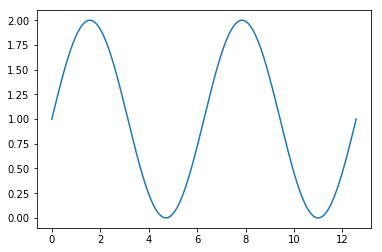

In [12]:
a=1
grilla=np.linspace(0,4*pi,1000)
array=np.sin(grilla)+a
intervalo=[0,4*pi]
g=mathf(array, intervalo)
g.plot()


Defino $y(t)=1$

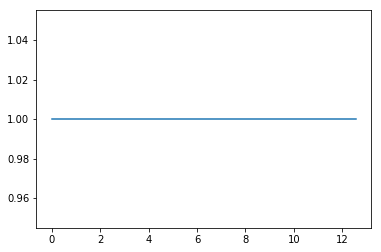

In [13]:
array=np.ones(1000)
intervalo=[0,4*pi]
y=mathf(array, intervalo)
y.plot()

In [14]:
T=4*pi
g(T)

1.0000000000000004

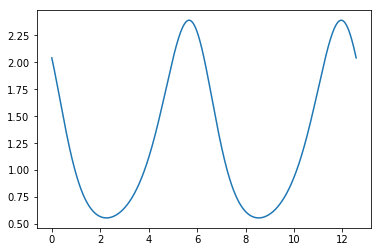

In [15]:
x=solver(g,y)
x.plot()

Apliquemos el Metodo de Newton para la ecuacion
$$x'(t)+x(t)=acos(x(t)+t)$$

Para $a=0$ la ecuacion es $$x'(t)+x(t)=0$$


Que tiene un equilibrio en $x(t)=0$

Quiero iterar $$x_{n+1}'+\big(1+asen(x_n+t)\big)x_{n+1}=acos(x_n+t)+asen(x_n+t)x_{n}$$

para $a$ chico, empezando en $x_0(t)=0$ 

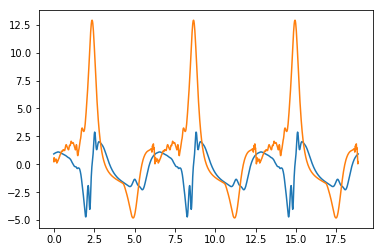

In [28]:
T=6*pi
xs=[0,1,2,3,4,5,6,7,8,9]
intervalo=[0,T]
x_0=mathf(np.zeros(1000),intervalo)
def non_linear_solver(a,x_0,n):
    xs=[]
    xs.append(x_0)
    for i in range(1,n):
        grilla=np.linspace(0,T,1000)
        #print('grilla: ',grilla)
        
        array_anterior=xs[i-1].array
        arg=array_anterior+grilla
        #print('argumento de los senos y cosenos: ',arg)
    
        g_array=1+a*np.sin(arg)
        g=mathf(g_array,intervalo)
    
        y_array= a*np.cos(arg)+a*np.sin(arg)*array_anterior
        y=mathf(y_array,intervalo)
        
        z=solver(g,y)
        
    
        xs.append(z)
        #z.plot()
    xs[-1].plot()
    xs[-2].plot()

    return xs[-1]

x=non_linear_solver(3,x_0,6)
   
    
    
    